In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
!pip install category_encoders
import category_encoders as ce
from sklearn.model_selection import train_test_split

# Loading Data

In [3]:
crime_train = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/train.csv")
crime_test = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/test.csv")

# Applying Some Basic EDA

In [4]:
crime_train.shape

(20000, 22)

In [5]:
crime_train.sample(5)

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
10744,22100 AVENUE MORELOS,NaN,34.1520,-118.6072,11/09/2020 12:00:00 AM,11/09/2020 12:00:00 AM,600.0,21.0,Topanga,2185.0,...,0.0,NaN,NaN,104.0,DRIVEWAY,NaN,NaN,IC,Invest Cont,Property Crimes
9958,HOOVER,8TH ST,34.0578,-118.2842,05/08/2020 12:00:00 AM,05/07/2020 12:00:00 AM,1900.0,2.0,Rampart,261.0,...,0.0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
13416,17700 SUPERIOR ST,NaN,34.2468,-118.5233,12/11/2020 12:00:00 AM,12/04/2020 12:00:00 AM,105.0,17.0,Devonshire,1787.0,...,25.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
16086,7200 TOPANGA CANYON BL,NaN,34.2034,-118.6135,05/22/2020 12:00:00 AM,05/22/2020 12:00:00 AM,2130.0,21.0,Topanga,2134.0,...,36.0,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,AA,Adult Arrest,Crimes against Public Order
1996,9900 ARLETA AV,NaN,34.2500,-118.4345,11/07/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1900.0,19.0,Mission,1959.0,...,0.0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes


In [6]:
crime_train.columns

Index(['Location', 'Cross_Street', 'Latitude', 'Longitude', 'Date_Reported',
       'Date_Occurred', 'Time_Occurred', 'Area_ID', 'Area_Name',
       'Reporting_District_no', 'Part 1-2', 'Modus_Operandi', 'Victim_Age',
       'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Premise_Description',
       'Weapon_Used_Code', 'Weapon_Description', 'Status',
       'Status_Description', 'Crime_Category'],
      dtype='object')

In [7]:
crime_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

### Columns with Null Values
* Cross Street
* Modus Operandi
* Victim Sex
* Victim Descent
* Premise Description
* Weapon Used Code
* Weapon Description

In [8]:
crime_train.isnull().sum()

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

### Observation regarding Victim Age
#### Min Value is negative, clearly an outlier

In [9]:
crime_train.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


In [10]:
crime_train.nunique()

Location                 12399
Cross_Street              1495
Latitude                  3622
Longitude                 3578
Date_Reported              811
Date_Occurred              366
Time_Occurred              996
Area_ID                     21
Area_Name                   21
Reporting_District_no     1120
Part 1-2                     2
Modus_Operandi           10489
Victim_Age                 100
Victim_Sex                   4
Victim_Descent              17
Premise_Code               217
Premise_Description        216
Weapon_Used_Code            57
Weapon_Description          57
Status                       5
Status_Description           5
Crime_Category               6
dtype: int64

In [11]:
print(crime_train.duplicated().sum())


13


In [12]:
target_col = crime_train.iloc[:, -1]

## Drop Duplicate Rows

In [13]:
crime_train.drop_duplicates(inplace=True)


## Exploring and Assesing the data

### % of null values in each col

In [14]:
null_dict = {}

for col in crime_train.columns:
    null_vals = crime_train[col].isnull().sum()
    null_percentage = (null_vals/crime_train.shape[0]) *100
    null_dict[col] = null_percentage
    
    
print(null_dict)

{'Location': 0.0, 'Cross_Street': 82.75378996347625, 'Latitude': 0.0, 'Longitude': 0.0, 'Date_Reported': 0.0, 'Date_Occurred': 0.0, 'Time_Occurred': 0.0, 'Area_ID': 0.0, 'Area_Name': 0.0, 'Reporting_District_no': 0.0, 'Part 1-2': 0.0, 'Modus_Operandi': 13.698904287787062, 'Victim_Age': 0.0, 'Victim_Sex': 13.118527042577677, 'Victim_Descent': 13.118527042577677, 'Premise_Code': 0.0, 'Premise_Description': 0.025016260569370095, 'Weapon_Used_Code': 63.326162005303445, 'Weapon_Description': 63.326162005303445, 'Status': 0.0, 'Status_Description': 0.0, 'Crime_Category': 0.0}


## Dropping redundant Columns with one to one mapping
Dropping Cross_Street column with more than 75% of column filled with null values and other columns in the dataset that provide very precise information about the location.

In [15]:
print("Weapon_Code_Used:", crime_train['Weapon_Used_Code'].nunique())
print("Weapon_Description:", crime_train['Weapon_Description'].nunique())

print("Status:", crime_train['Status'].nunique())
print("Status_Description:", crime_train['Status_Description'].nunique())

print("Area_ID:", crime_train['Area_ID'].nunique())
print("Area_Description:", crime_train['Area_Name'].nunique())

print("Premise_Code:", crime_train['Premise_Code'].nunique())
print("Premise_Description:", crime_train['Premise_Description'].nunique())

Weapon_Code_Used: 57
Weapon_Description: 57
Status: 5
Status_Description: 5
Area_ID: 21
Area_Description: 21
Premise_Code: 217
Premise_Description: 216


In [16]:
cols_to_drop = ['Cross_Street', 'Area_ID', 'Premise_Code', 'Status', 'Weapon_Used_Code' ]

crime_train = crime_train.drop(columns = cols_to_drop)
crime_test = crime_test.drop(columns = cols_to_drop)

In [17]:
crime_train.head()

,Location,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Description,Weapon_Description,Status_Description,Crime_Category
0,4500 CARPENTER AV,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,N Hollywood,1563.0,1.0,0385,75.0,M,W,STREET,NaN,Invest Cont,Property Crimes
1,45TH ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,Newton,1367.0,1.0,0906 0352 0371 0446 1822 0344 0416 0417,41.0,M,H,SWAP MEET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,Newton,1343.0,2.0,0329 1202,67.0,M,B,SINGLE FAMILY DWELLING,NaN,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,Mission,1924.0,1.0,0329 1300,61.0,M,H,STREET,NaN,Invest Cont,Property Crimes
4,7100 S VERMONT AV,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,77th Street,1245.0,1.0,0416 0945 1822 0400 0417 0344,0.0,X,X,MINI-MART,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,Property Crimes


## Univariate Analysis

<Axes: xlabel='Crime_Category', ylabel='count'>

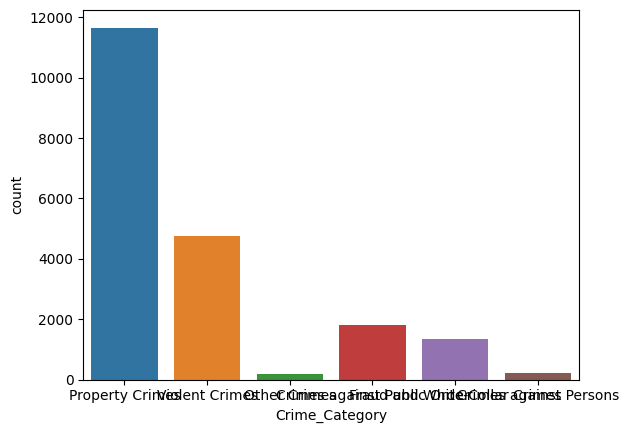

In [18]:
sns.countplot(x='Crime_Category', data=crime_train)

<Axes: ylabel='count'>

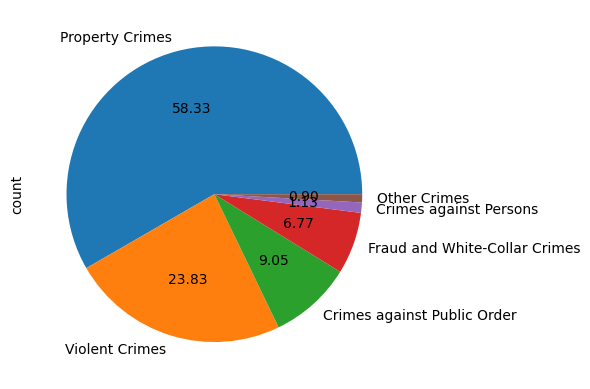

In [19]:
crime_train['Crime_Category'].value_counts().plot(kind='pie', autopct='%.2f')

#### Uneven distribution: The pie chart clearly shows that the crime categories are not evenly distributed. Some slices are much larger than others, which is a key indicator of imbalance.

Dominant category: "Property Crimes" accounts for 58.33% of all crimes, which is more than half of the total. This significant overrepresentation of one category is a strong sign of imbalance.

Imbalance Ratio = Majority Class Percentage / Minority Class Percentage
= 58.33 / 0.79
≈ 73.84
This means that for every instance of the minority class (Other Crimes), there are approximately 74 instances of the majority class (Property Crimes).
Interpretation:

An imbalance ratio of 1 would indicate perfect balance.
The further this ratio is from 1, the more imbalanced the dataset.
A ratio of 73.84 indicates a highly imbalanced dataset.

<Axes: xlabel='Victim_Sex', ylabel='count'>

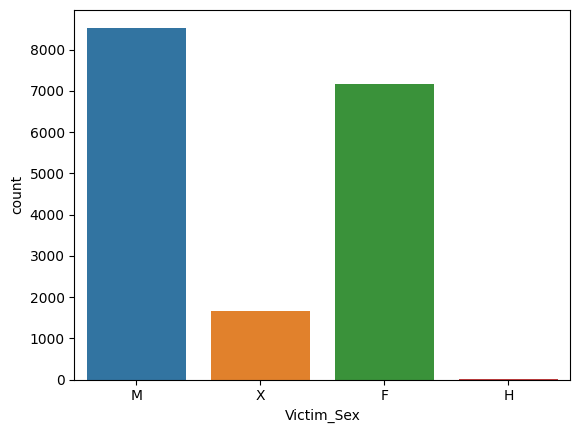

In [20]:
sns.countplot(x='Victim_Sex', data=crime_train)

<Axes: xlabel='Status_Description', ylabel='count'>

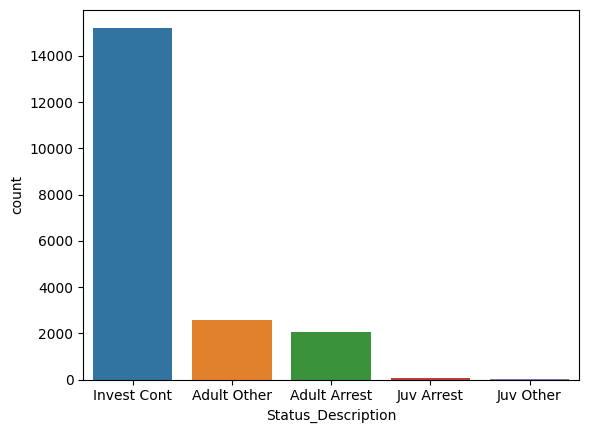

In [21]:
sns.countplot(x='Status_Description', data=crime_train)

<Axes: xlabel='Part 1-2', ylabel='count'>

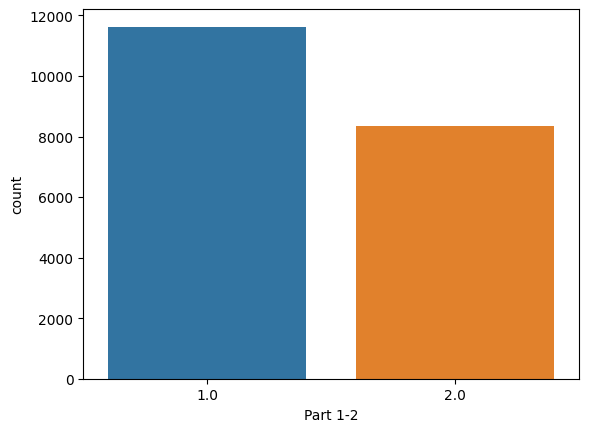

In [22]:
sns.countplot(x='Part 1-2', data=crime_train)

Victim_Descent
H    6141
W    4241
B    2881
X    1844
O    1603
A     427
K      83
C      51
F      48
J      16
I      11
V       8
P       4
Z       3
U       2
D       1
G       1
Name: count, dtype: int64


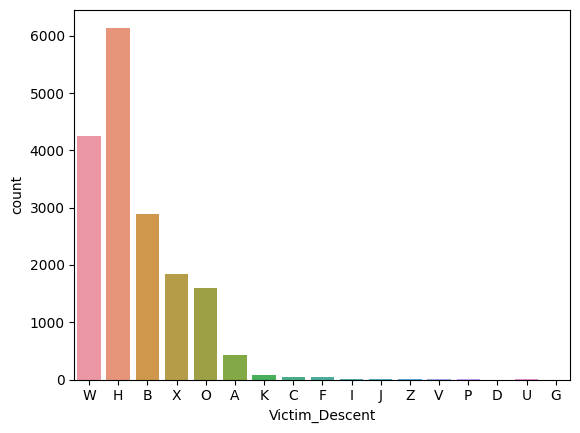

In [23]:
sns.countplot(x='Victim_Descent', data=crime_train)
print(crime_train['Victim_Descent'].value_counts())

/tmp/ipykernel_33/2421739308.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crime_train['Victim_Age'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Victim_Age', ylabel='Density'>

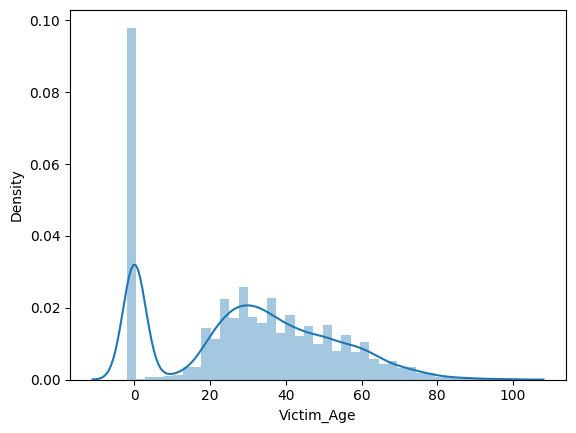

In [24]:
sns.distplot(crime_train['Victim_Age'])

<Axes: >

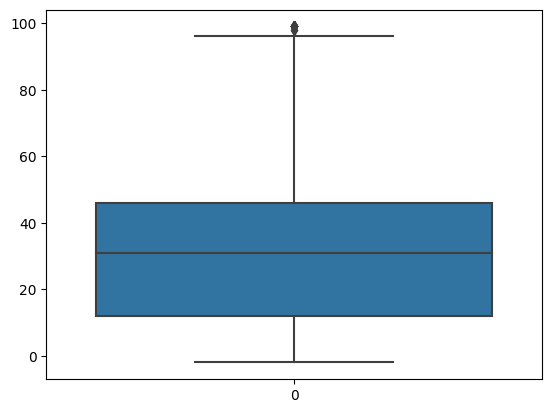

In [25]:
sns.boxplot(crime_train['Victim_Age'])

In [26]:
crime_train['Victim_Age'].skew()

0.11422114804953067

### Univariate Analysis Observation:

* The dataset revealed an uneven distribution of crime categories.**
* Property Crimes dominated the dataset, accounting for 58.33% of all crimes.**
* The Imbalance Ratio between the majority class (Property Crimes) and the minority class (Other Crimes) was approximately 73.84.**
* This high imbalance indicates that the dataset is heavily skewed towards Property Crimes, which might affect model performance if not addressed.**

## EDA using Bivariate and Multi- Variate Analysis

<Axes: xlabel='Victim_Sex', ylabel='Victim_Age'>

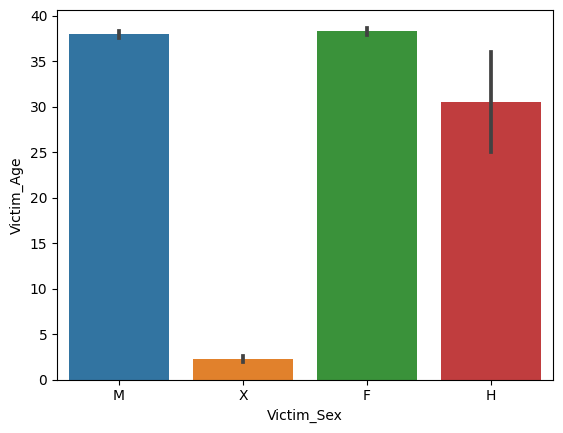

In [27]:
sns.barplot(x='Victim_Sex', y='Victim_Age', data=crime_train)

In [28]:
pd.crosstab(crime_train['Crime_Category'], crime_train['Victim_Sex'])

Victim_Sex,F,H,M,X
Crime_Category,,,,
Crimes against Persons,133,0,91,1
Crimes against Public Order,888,0,768,152
Fraud and White-Collar Crimes,622,1,628,69
Other Crimes,49,0,84,46
Property Crimes,3016,1,4720,1335
Violent Crimes,2467,0,2242,52


In [29]:
pd.crosstab(crime_train['Crime_Category'], crime_train['Part 1-2'])

Part 1-2,1.0,2.0
Crime_Category,,
Crimes against Persons,33,192
Crimes against Public Order,331,1477
Fraud and White-Collar Crimes,0,1354
Other Crimes,0,179
Property Crimes,9652,2007
Violent Crimes,1612,3150


## Data Cleaning and Feature Construction from existing features
* Standardizing Loation data, extracting information like street numbers and types.
* Creating useful features like day of week, month, season, etc from data and time columns.
* Create Age groups from the victim age data.
* Missing values are handled using various techniques (mode imputation, KNN imputation for coordinates).




## Analysing the Location Column

In [30]:
location = crime_train['Location'].iloc[4]
print(location)

7100 S  VERMONT                      AV


### Standardizing the Location Column and Cleaning it.
#### Extracting New features like Street Number, Direction, Type of Street from it.

In [31]:
def get_type_of_street(location):
  type_street = []
  for loc in location:
    new_loc = loc.split()
    type_street.append(new_loc[-1])
  return type_street

street_type = pd.Series(get_type_of_street(crime_train['Location']))
street_type.nunique()
street_type.value_counts()


ST           6578
AV           5744
BL           3719
DR            782
PL            563
             ... 
PASADENA        1
117TH           1
CLOVER          1
HYPERION        1
INGLEWOOD       1
Name: count, Length: 642, dtype: int64

In [32]:
def process_location(loc):
    parts = loc.strip().upper().split()

    if len(parts) < 2:
        return pd.Series({'Number': '', 'Direction': '', 'Street_Name': loc.strip().upper(), 'Street_Type': ''})

    number = parts[0] if parts[0].isdigit() else ''

    if len(parts) > 1 and parts[1] in ['N', 'S', 'E', 'W']:
        direction = parts[1]
        street_name_start = 2
    else:
        direction = ''
        street_name_start = 1 if number else 0

    street_type = parts[-1] if len(parts) > 1 else ''

    street_name = ' '.join(parts[street_name_start:-1]) if len(parts) > street_name_start + 1 else ' '.join(parts[street_name_start:])

    return pd.Series({
        'Number': number,
        'Direction': direction,
        'Street_Name': street_name,
        'Street_Type': street_type
    })

crime_train['Location'] = crime_train['Location'].astype(str)
crime_train[['Number', 'Direction', 'Street_Name', 'Street_Type']] = crime_train['Location'].apply(process_location)

street_types = {'AV': 'AVENUE', 'ST': 'STREET', 'BL': 'BOULEVARD', 'DR': 'DRIVE', 'WY': 'WAY'}
crime_train['Street_Type'] = crime_train['Street_Type'].map(street_types).fillna(crime_train['Street_Type'])

crime_train['Standardized_Location'] = crime_train['Number'] + ' ' + crime_train['Direction'] + ' ' + crime_train['Street_Name'] + ' ' + crime_train['Street_Type']
crime_train['Standardized_Location'] = crime_train['Standardized_Location'].str.strip().str.replace('  ', ' ')

In [33]:
crime_test['Location'] = crime_test['Location'].astype(str)
crime_test[['Number', 'Direction', 'Street_Name', 'Street_Type']] = crime_test['Location'].apply(process_location)

# Standardizing street types
street_types = {'AV': 'AVENUE', 'ST': 'STREET', 'BL': 'BOULEVARD', 'DR': 'DRIVE', 'WY': 'WAY'}
crime_test['Street_Type'] = crime_test['Street_Type'].map(street_types).fillna(crime_test['Street_Type'])

crime_test['Standardized_Location'] = crime_test['Number'] + ' ' + crime_test['Direction'] + ' ' + crime_test['Street_Name'] + ' ' + crime_test['Street_Type']
crime_test['Standardized_Location'] = crime_test['Standardized_Location'].str.strip().str.replace('  ', ' ')

In [34]:
crime_train.sample()

,Location,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,...,Victim_Descent,Premise_Description,Weapon_Description,Status_Description,Crime_Category,Number,Direction,Street_Name,Street_Type,Standardized_Location
9905,5200 S MAIN ST,33.9924,-118.2772,01/10/2022 12:00:00 AM,04/01/2020 12:00:00 AM,1130.0,Newton,1371.0,2.0,0100,...,B,OTHER RESIDENCE,NaN,Invest Cont,Fraud and White-Collar Crimes,5200,S,MAIN,STREET,5200 S MAIN STREET


### Cleaning and Converting date columns to date time using str methods,

In [35]:
print(crime_train['Date_Reported'].sample())
print(crime_train['Date_Occurred'].sample())

4028    02/09/2020 12:00:00 AM
Name: Date_Reported, dtype: object
16187    08/07/2020 12:00:00 AM
Name: Date_Occurred, dtype: object


In [36]:
crime_train['Date_Reported'] = crime_train['Date_Reported'].str.split(' ').str[0]
crime_train['Date_Occurred'] = crime_train['Date_Occurred'].str.split(' ').str[0]

crime_train['Date_Reported'] = pd.to_datetime(crime_train['Date_Reported'], format='%m/%d/%Y')
crime_train['Date_Occurred'] = pd.to_datetime(crime_train['Date_Occurred'], format='%m/%d/%Y')


# Remove the time part from Date_Reported and Date_Occurred
crime_test['Date_Reported'] = crime_test['Date_Reported'].str.split(' ').str[0]
crime_test['Date_Occurred'] = crime_test['Date_Occurred'].str.split(' ').str[0]

crime_test['Date_Reported'] = pd.to_datetime(crime_train['Date_Reported'], format='%m/%d/%Y')
crime_test['Date_Occurred'] = pd.to_datetime(crime_train['Date_Occurred'], format='%m/%d/%Y')

In [37]:
print(crime_train['Date_Reported'].sample())
print(crime_train['Date_Occurred'].sample())

1584   2020-07-17
Name: Date_Reported, dtype: datetime64[ns]
9786   2020-11-12
Name: Date_Occurred, dtype: datetime64[ns]


### Extracts year, month, day, day of week, and quarter for both reported and occurred dates.
#### Calculates the number of days between occurrence and reporting.
#### Creates a season feature based on the month of occurrence.
#### Adds a binary feature for whether the crime occurred on a weekend.

In [38]:
def process_date_columns(df):

    df['Report_Year'] = df['Date_Reported'].dt.year
    df['Report_Month'] = df['Date_Reported'].dt.month
    df['Report_Day'] = df['Date_Reported'].dt.day
    df['Report_DayOfWeek'] = df['Date_Reported'].dt.dayofweek
    df['Report_Quarter'] = df['Date_Reported'].dt.quarter

    df['Occur_Year'] = df['Date_Occurred'].dt.year
    df['Occur_Month'] = df['Date_Occurred'].dt.month
    df['Occur_Day'] = df['Date_Occurred'].dt.day
    df['Occur_DayOfWeek'] = df['Date_Occurred'].dt.dayofweek
    df['Occur_Quarter'] = df['Date_Occurred'].dt.quarter

    df['Days_To_Report'] = (df['Date_Reported'] - df['Date_Occurred']).dt.days

    def get_season(month):
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        else:
            return 'Fall'

    df['Occur_Season'] = df['Occur_Month'].apply(get_season)

    df['Is_Weekend'] = df['Occur_DayOfWeek'].isin([5, 6]).astype(int)

    return df

crime_train = process_date_columns(crime_train)

In [39]:
# Apply the function to your test set
crime_test = process_date_columns(crime_test)

In [40]:
crime_train.sample(3)

,Location,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,...,Report_DayOfWeek,Report_Quarter,Occur_Year,Occur_Month,Occur_Day,Occur_DayOfWeek,Occur_Quarter,Days_To_Report,Occur_Season,Is_Weekend
1143,7000 S BROADWAY,33.9789,-118.2795,2020-09-01,2020-08-31,1740.0,Newton,1391.0,2.0,0329 1307,...,1,3,2020,8,31,0,3,1,Summer,0
9699,600 S SPRING ST,34.0467,-118.2520,2020-12-26,2020-12-25,2350.0,Central,153.0,1.0,0354 0913 2033 1251 0444 1310 0344 1300,...,5,4,2020,12,25,4,4,1,Winter,0
16119,11400 MONA BL,33.9304,-118.2307,2021-02-05,2020-12-02,1125.0,Southeast,1849.0,1.0,0394 1822,...,4,1,2020,12,2,2,4,65,Winter,0


### Analysing Time Occurred 

In [41]:
print(crime_train['Time_Occurred'].isnull().sum())

0


In [42]:
print(crime_train['Time_Occurred'].sample())

6485    940.0
Name: Time_Occurred, dtype: float64


#### Convert Time_Occurred to a string and pad with zeros

In [43]:
crime_train['Time_Occurred'] = crime_train['Time_Occurred'].apply(lambda x: f'{int(x):04}')
crime_test['Time_Occurred'] = crime_test['Time_Occurred'].apply(lambda x: f'{int(x):04}')

### Micro-features : Extract Hour and Minutes

In [44]:
crime_train['Hour'] = crime_train['Time_Occurred'].str[:2].astype(int)
crime_train['Minute'] = crime_train['Time_Occurred'].str[2:].astype(int)



In [45]:
crime_test['Hour'] = crime_test['Time_Occurred'].str[:2].astype(int)
crime_test['Minute'] = crime_test['Time_Occurred'].str[2:].astype(int)

In [46]:
crime_test.sample(5)

,Location,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,...,Occur_Year,Occur_Month,Occur_Day,Occur_DayOfWeek,Occur_Quarter,Days_To_Report,Occur_Season,Is_Weekend,Hour,Minute
176,8TH ST,34.0544,-118.2767,2020-03-21,2020-03-21,1430,Rampart,265.0,1.0,1402 0334 0443 0355 0342 0431 0449 0369 0906 1822,...,2020,3,21,5,1,0,Spring,1,14,30
4575,3500 VALLEY BL,34.0655,-118.2022,2020-01-08,2020-01-08,1600,Hollenbeck,443.0,1.0,1202 0344,...,2020,1,8,2,1,0,Winter,0,16,0
1965,4400 CORLISS ST,34.1287,-118.2192,2020-08-07,2020-08-07,1225,Northeast,1117.0,2.0,0400 1601 0446 2021 0558,...,2020,8,7,4,3,0,Summer,0,12,25
1020,9400 CORBIN AV,34.2410,-118.5623,2020-07-23,2020-07-11,1800,Devonshire,1764.0,1.0,0321 0344 1602,...,2020,7,11,5,3,12,Summer,1,18,0
549,12000 FOOTHILL BL,34.2754,-118.3904,2020-11-21,2020-11-20,1730,Foothill,1615.0,1.0,NaN,...,2020,11,20,4,4,1,Fall,0,17,30


### Create bins for time of day
* Night
* Morning
* Afternoon
* Evening

In [47]:
def time_of_day(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

crime_train['Time_of_Day'] = crime_train['Hour'].apply(time_of_day)

In [48]:
crime_test['Time_of_Day'] = crime_test['Hour'].apply(time_of_day)

In [49]:
print(crime_train[['Time_Occurred', 'Hour', 'Minute', 'Time_of_Day']].head())

  Time_Occurred  Hour  Minute Time_of_Day
0          1800    18       0     Evening
1          1345    13      45   Afternoon
2          0605     6       5     Morning
3          1800    18       0     Evening
4          1130    11      30     Morning


## Creating a binary feature "Same_Year_Report" (True if Occur_Year == Report_Year). 

**This will capture the essence of both year columns without the redundancy**

**This captures the essence of both year columns without the redundancy**

In [50]:
crime_train['Same_Year_Report'] = (crime_train['Occur_Year'] == crime_train['Report_Year']).astype(int)
crime_test['Same_Year_Report'] = (crime_test['Occur_Year'] == crime_test['Report_Year']).astype(int)


In [51]:
crime_train.sample(4)

,Location,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,...,Occur_Day,Occur_DayOfWeek,Occur_Quarter,Days_To_Report,Occur_Season,Is_Weekend,Hour,Minute,Time_of_Day,Same_Year_Report
6834,5300 LANKERSHIM BL,34.1720,-118.3789,2020-06-16,2020-06-16,0030,N Hollywood,1549.0,1.0,0344 2050 0910 2034,...,16,1,2,0,Summer,0,0,30,Night,1
12215,1200 E 56TH ST,33.9921,-118.2542,2020-01-02,2020-01-02,1054,Newton,1375.0,2.0,0421,...,2,3,1,0,Winter,0,10,54,Morning,1
10990,500 S LORENA ST,34.0339,-118.2012,2020-02-05,2020-02-04,1730,Hollenbeck,465.0,2.0,0329 1300,...,4,1,1,1,Winter,0,17,30,Afternoon,1
19622,600 S BERENDO ST,34.0608,-118.2941,2020-05-27,2020-05-13,0001,Olympic,2036.0,2.0,0100 1822 0930 0922,...,13,2,2,14,Spring,0,0,1,Night,1


In [52]:
crime_train.columns

Index(['Location', 'Latitude', 'Longitude', 'Date_Reported', 'Date_Occurred',
       'Time_Occurred', 'Area_Name', 'Reporting_District_no', 'Part 1-2',
       'Modus_Operandi', 'Victim_Age', 'Victim_Sex', 'Victim_Descent',
       'Premise_Description', 'Weapon_Description', 'Status_Description',
       'Crime_Category', 'Number', 'Direction', 'Street_Name', 'Street_Type',
       'Standardized_Location', 'Report_Year', 'Report_Month', 'Report_Day',
       'Report_DayOfWeek', 'Report_Quarter', 'Occur_Year', 'Occur_Month',
       'Occur_Day', 'Occur_DayOfWeek', 'Occur_Quarter', 'Days_To_Report',
       'Occur_Season', 'Is_Weekend', 'Hour', 'Minute', 'Time_of_Day',
       'Same_Year_Report'],
      dtype='object')

## Longitude and Latitude Columns

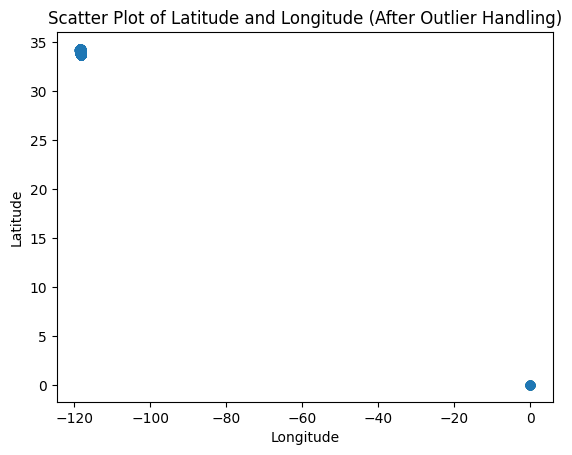

In [53]:
plt.scatter(crime_train['Longitude'], crime_train['Latitude'], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Latitude and Longitude (After Outlier Handling)')
plt.show()

##### Step 1: Replace (0,0) coordinates with np.nan


##### Step 2: Check the number of NaN values


In [54]:
crime_train.loc[(crime_train['Latitude'] == 0) & (crime_train['Longitude'] == 0), ['Latitude', 'Longitude']] = np.nan

print("Number of NaN values in Latitude:", crime_train['Latitude'].isna().sum())
print("Number of NaN values in Longitude:", crime_train['Longitude'].isna().sum())

Number of NaN values in Latitude: 78
Number of NaN values in Longitude: 78


In [55]:
crime_test.loc[(crime_train['Latitude'] == 0) & (crime_train['Longitude'] == 0), ['Latitude', 'Longitude']] = np.nan


### Analysing Victim Age Column

/tmp/ipykernel_33/2421739308.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crime_train['Victim_Age'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Victim_Age', ylabel='Density'>

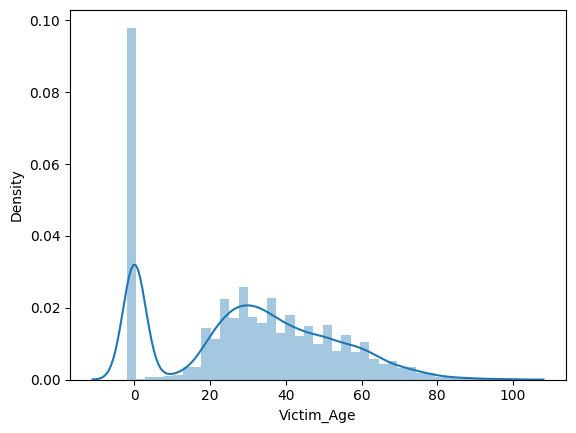

In [56]:
sns.distplot(crime_train['Victim_Age'])

<Axes: >

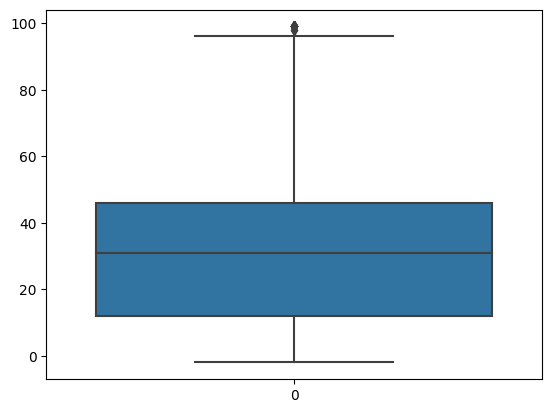

In [57]:
sns.boxplot(crime_train['Victim_Age'])

In [58]:
crime_train['Victim_Age'].describe()

count    19987.000000
mean        30.149497
std         21.861242
min         -2.000000
25%         12.000000
50%         31.000000
75%         46.000000
max         99.000000
Name: Victim_Age, dtype: float64

### Investigating the nature of the age 0 peak is a good 

---


#### Count the occurrences of age 0:

In [59]:
zero_age_count = (crime_train['Victim_Age'] == 0).sum()
total_count = len(crime_train)
percentage = (zero_age_count / total_count) * 100

print(f"Number of victims with age 0: {zero_age_count}")
print(f"Percentage of victims with age 0: {percentage:.2f}%")

Number of victims with age 0: 4819
Percentage of victims with age 0: 24.11%


In [60]:
age_zero_data = crime_train[crime_train['Victim_Age'] == 0]
print(age_zero_data['Crime_Category'].value_counts(normalize=True))
print(age_zero_data['Victim_Sex'].value_counts(normalize=True))
print(age_zero_data['Victim_Descent'].value_counts(normalize=True))

Crime_Category
Property Crimes                  0.890434
Crimes against Public Order      0.040257
Violent Crimes                   0.029259
Fraud and White-Collar Crimes    0.023864
Other Crimes                     0.014111
Crimes against Persons           0.002075
Name: proportion, dtype: float64
Victim_Sex
X    0.677434
M    0.287989
F    0.034577
Name: proportion, dtype: float64
Victim_Descent
X    0.706096
W    0.127389
O    0.106460
H    0.047316
B    0.008644
A    0.003640
K    0.000455
Name: proportion, dtype: float64


#### **Observation**

The high percentage of age 0 victims, combined with the high rates of unknown sex and descent, strongly suggests that age 0 is being used as a code for unknown or missing age data, rather than representing actual infant victims. Data Quality Issues: This pattern indicates a data quality issue where missing demographic information (age, sex, descent) is being coded as 0 or X instead of being left blank or marked as NA/null.

Property Crimes: The high proportion of property crimes for age 0 victims further supports the idea that these are not actual infants, as infants are unlikely to be direct victims of property crimes.

Replace 0 and negative age with NaN:

In [61]:
negative_age_count = (crime_train['Victim_Age'] < 0).sum()
print(f"Number of victims with negative age: {negative_age_count}")

Number of victims with negative age: 6


In [62]:
crime_train['Victim_Age'] = crime_train['Victim_Age'].apply(lambda x: np.nan if x <= 0 else x)
crime_test['Victim_Age'] = crime_test['Victim_Age'].apply(lambda x: np.nan if x <= 0 else x)

In [63]:
nan_count = crime_train['Victim_Age'].isna().sum()
print(f"Number of missing (NaN) ages: {nan_count}")
print(f"Percentage of missing ages: {(nan_count / len(crime_train)) * 100:.2f}%")

Number of missing (NaN) ages: 4825
Percentage of missing ages: 24.14%


#### Create age groups from the Victim Age Column

In [64]:
def categorize_age(age):
    if pd.isna(age):
        return 'Unknown'
    elif age < 18:
        return 'Under 18'
    elif age < 30:
        return '18-29'
    elif age < 50:
        return '30-49'
    elif age < 65:
        return '50-64'
    else:
        return '65+'

crime_train['Age_Group'] = crime_train['Victim_Age'].apply(categorize_age)
crime_test['Age_Group'] = crime_test['Victim_Age'].apply(categorize_age)

In [65]:
crime_train[['Victim_Age', 'Age_Group']]

,Victim_Age,Age_Group
0,75.0,65+
1,41.0,30-49
2,67.0,65+
3,61.0,50-64
4,NaN,Unknown
...,...,...
19995,51.0,50-64
19996,NaN,Unknown
19997,42.0,30-49
19998,76.0,65+


### Victim Descent Column

In [66]:
crime_train['Victim_Descent'].sample()

10431    H
Name: Victim_Descent, dtype: object

In [67]:
crime_train['Victim_Descent'].value_counts()

Victim_Descent
H    6141
W    4241
B    2881
X    1844
O    1603
A     427
K      83
C      51
F      48
J      16
I      11
V       8
P       4
Z       3
U       2
D       1
G       1
Name: count, dtype: int64

In [68]:
crime_train['Victim_Descent'].nunique()

17

<Axes: xlabel='Victim_Descent', ylabel='count'>

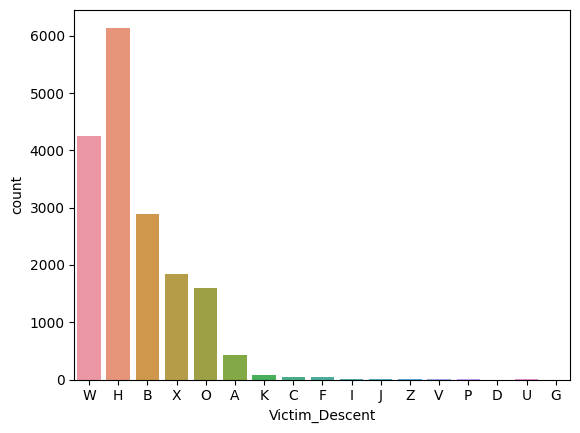

In [69]:
sns.countplot(x='Victim_Descent', data=crime_train)

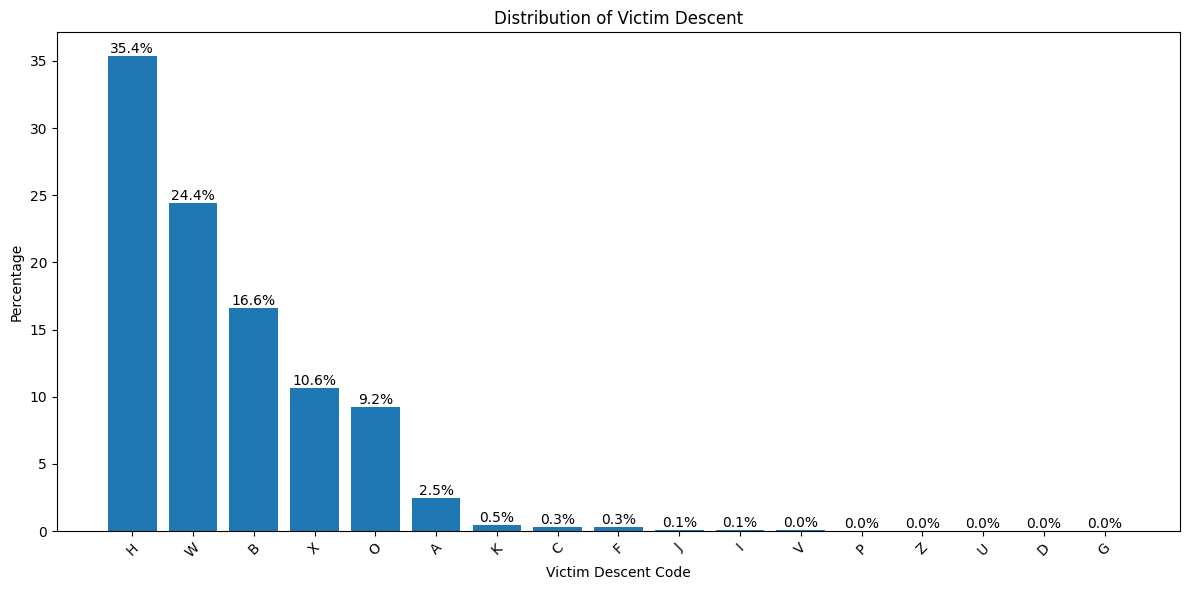

In [70]:
descent_data = {
    'Victim_Descent': ['H', 'W', 'B', 'X', 'O', 'A', 'K', 'C', 'F', 'J', 'I', 'V', 'P', 'Z', 'U', 'D', 'G'],
    'count': [6141, 4241, 2881, 1844, 1603, 427, 83, 51, 48, 16, 11, 8, 4, 3, 2, 1, 1]
}
df = pd.DataFrame(descent_data)

df['percentage'] = df['count'] / df['count'].sum() * 100

df = df.sort_values('count', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(df['Victim_Descent'], df['percentage'])
plt.title('Distribution of Victim Descent')
plt.xlabel('Victim Descent Code')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

#percentage labels on top of each bar
for i, v in enumerate(df['percentage']):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [71]:
print(df)
print(f"\nTotal records: {df['count'].sum()}")
print(f"Number of categories: {len(df)}")

   Victim_Descent  count  percentage
0               H   6141   35.364238
1               W   4241   24.422689
2               B   2881   16.590844
3               X   1844   10.619061
4               O   1603    9.231212
5               A    427    2.458969
6               K     83    0.477973
7               C     51    0.293694
8               F     48    0.276418
9               J     16    0.092139
10              I     11    0.063346
11              V      8    0.046070
12              P      4    0.023035
13              Z      3    0.017276
14              U      2    0.011517
15              D      1    0.005759
16              G      1    0.005759

Total records: 17365
Number of categories: 17


In [72]:
crime_train['Victim_Descent_Handled'] = crime_train['Victim_Descent'].fillna('Unknown')
crime_test['Victim_Descent_Handled'] = crime_test['Victim_Descent'].fillna('Unknown')



In [73]:
def group_minor_categories(descent):
    major_categories = ['H', 'W', 'B', 'X', 'O', 'A', 'Unknown']
    return descent if descent in major_categories else 'Other'

In [74]:
crime_train['Victim_Descent_Grouped'] = crime_train['Victim_Descent_Handled'].apply(group_minor_categories)


In [75]:
crime_test['Victim_Descent_Grouped'] = crime_test['Victim_Descent_Handled'].apply(group_minor_categories)

In [76]:
crime_train['Victim_Descent_Grouped'].value_counts()

Victim_Descent_Grouped
H          6141
W          4241
B          2881
Unknown    2622
X          1844
O          1603
A           427
Other       228
Name: count, dtype: int64

### Victim Sex Column

In [77]:
print(crime_train['Victim_Sex'].value_counts())

Victim_Sex
M    8533
F    7175
X    1655
H       2
Name: count, dtype: int64


<Axes: xlabel='Victim_Sex', ylabel='count'>

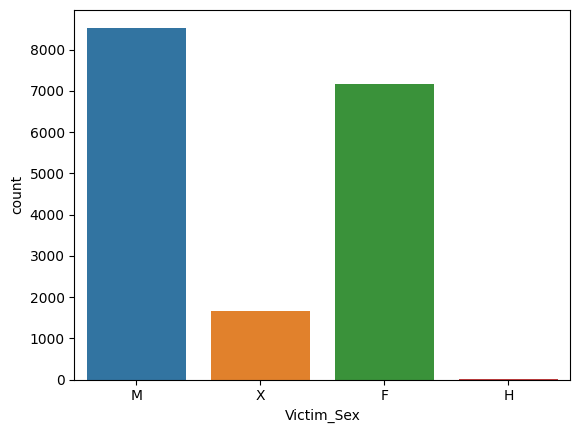

In [78]:
sns.countplot(x='Victim_Sex', data=crime_train)

In [79]:
crime_train['Victim_Sex'].isnull().sum()  

2622

In [80]:
def process_victim_sex(sex):
    if pd.isnull(sex) or sex == 'X':
        return 'Unknown'
    elif sex in ['M', 'F']:
        return sex
    else:
        return 'Other'

crime_train['Victim_Sex_Processed'] = crime_train['Victim_Sex'].apply(process_victim_sex)

In [81]:
crime_test['Victim_Sex_Processed'] = crime_test['Victim_Sex'].apply(process_victim_sex)

In [82]:
print(crime_train.columns)
print(crime_test.columns)

Index(['Location', 'Latitude', 'Longitude', 'Date_Reported', 'Date_Occurred',
       'Time_Occurred', 'Area_Name', 'Reporting_District_no', 'Part 1-2',
       'Modus_Operandi', 'Victim_Age', 'Victim_Sex', 'Victim_Descent',
       'Premise_Description', 'Weapon_Description', 'Status_Description',
       'Crime_Category', 'Number', 'Direction', 'Street_Name', 'Street_Type',
       'Standardized_Location', 'Report_Year', 'Report_Month', 'Report_Day',
       'Report_DayOfWeek', 'Report_Quarter', 'Occur_Year', 'Occur_Month',
       'Occur_Day', 'Occur_DayOfWeek', 'Occur_Quarter', 'Days_To_Report',
       'Occur_Season', 'Is_Weekend', 'Hour', 'Minute', 'Time_of_Day',
       'Same_Year_Report', 'Age_Group', 'Victim_Descent_Handled',
       'Victim_Descent_Grouped', 'Victim_Sex_Processed'],
      dtype='object')
Index(['Location', 'Latitude', 'Longitude', 'Date_Reported', 'Date_Occurred',
       'Time_Occurred', 'Area_Name', 'Reporting_District_no', 'Part 1-2',
       'Modus_Operandi', 'Victim

#### Dropping more redundant columns after  creating micro features which capture the information of these columns

In [83]:
crime_train = crime_train.drop(['Location', 'Victim_Descent_Handled', 'Standardized_Location', 'Date_Reported', 'Date_Occurred', 'Time_Occurred', 'Victim_Descent', 'Victim_Sex',], axis=1)
crime_test = crime_test.drop(['Location', 'Victim_Descent_Handled', 'Standardized_Location', 'Date_Reported', 'Date_Occurred', 'Time_Occurred','Victim_Descent', 'Victim_Sex',], axis=1)

In [84]:
columns_to_drop = ['Occur_Year', 'Report_Year']
crime_train = crime_train.drop(columns=columns_to_drop)
crime_test = crime_test.drop(columns=columns_to_drop)

In [85]:
crime_train.sample()

,Latitude,Longitude,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Premise_Description,Weapon_Description,Status_Description,...,Days_To_Report,Occur_Season,Is_Weekend,Hour,Minute,Time_of_Day,Same_Year_Report,Age_Group,Victim_Descent_Grouped,Victim_Sex_Processed
4272,34.2625,-118.3463,Foothill,1655.0,2.0,NaN,34.0,OTHER BUSINESS,NaN,Invest Cont,...,0,Summer,1,14,28,Afternoon,1,30-49,O,F


### Some more EDA

#### Distribution of the Crime Category

In [86]:
pd.crosstab(crime_train['Crime_Category'], crime_train['Age_Group'])

Age_Group,18-29,30-49,50-64,65+,Under 18,Unknown
Crime_Category,,,,,,
Crimes against Persons,12,12,8,2,181,10
Crimes against Public Order,374,730,341,121,48,194
Fraud and White-Collar Crimes,282,525,273,147,11,116
Other Crimes,26,38,34,7,6,68
Property Crimes,1867,3307,1512,624,53,4296
Violent Crimes,1466,1932,760,233,230,141


**Observation: Property Crimes in the age group 30-49 are the highest**

In [87]:
pd.crosstab(crime_train['Crime_Category'], crime_train['Victim_Sex_Processed'])

Victim_Sex_Processed,F,M,Other,Unknown
Crime_Category,,,,
Crimes against Persons,133,91,0,1
Crimes against Public Order,888,768,0,152
Fraud and White-Collar Crimes,622,628,1,103
Other Crimes,49,84,0,46
Property Crimes,3016,4720,1,3922
Violent Crimes,2467,2242,0,53


<Axes: xlabel='Age_Group', ylabel='Crime_Category'>

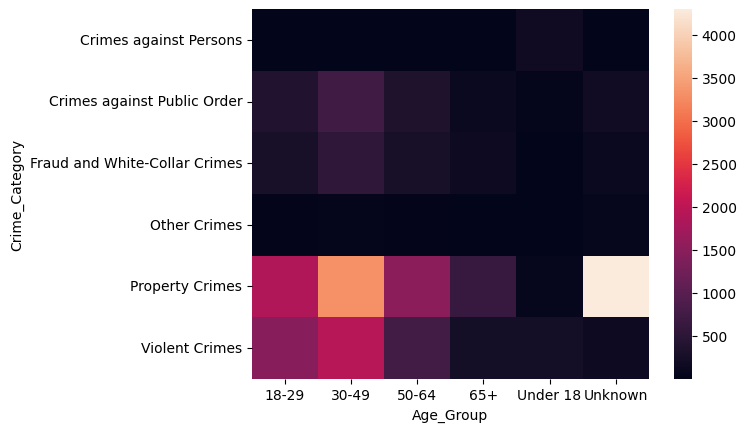

In [88]:
sns.heatmap(pd.crosstab(crime_train['Crime_Category'], crime_train['Age_Group']))

In [89]:
crime_train.columns

Index(['Latitude', 'Longitude', 'Area_Name', 'Reporting_District_no',
       'Part 1-2', 'Modus_Operandi', 'Victim_Age', 'Premise_Description',
       'Weapon_Description', 'Status_Description', 'Crime_Category', 'Number',
       'Direction', 'Street_Name', 'Street_Type', 'Report_Month', 'Report_Day',
       'Report_DayOfWeek', 'Report_Quarter', 'Occur_Month', 'Occur_Day',
       'Occur_DayOfWeek', 'Occur_Quarter', 'Days_To_Report', 'Occur_Season',
       'Is_Weekend', 'Hour', 'Minute', 'Time_of_Day', 'Same_Year_Report',
       'Age_Group', 'Victim_Descent_Grouped', 'Victim_Sex_Processed'],
      dtype='object')

In [90]:
pd.crosstab(crime_train['Crime_Category'], crime_train['Victim_Sex_Processed'])

Victim_Sex_Processed,F,M,Other,Unknown
Crime_Category,,,,
Crimes against Persons,133,91,0,1
Crimes against Public Order,888,768,0,152
Fraud and White-Collar Crimes,622,628,1,103
Other Crimes,49,84,0,46
Property Crimes,3016,4720,1,3922
Violent Crimes,2467,2242,0,53


In [91]:
pd.crosstab(crime_train['Crime_Category'], crime_train['Victim_Descent_Grouped'])

Victim_Descent_Grouped,A,B,H,O,Other,Unknown,W,X
Crime_Category,,,,,,,,
Crimes against Persons,3,51,140,11,0,0,19,1
Crimes against Public Order,22,371,724,132,6,0,383,170
Fraud and White-Collar Crimes,45,221,343,142,45,34,450,74
Other Crimes,2,20,50,18,0,0,40,49
Property Crimes,266,1124,2556,994,161,2587,2500,1471
Violent Crimes,89,1094,2328,306,16,1,849,79


In [92]:
crime_test.isnull().sum()

Latitude                     0
Longitude                    0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi             684
Victim_Age                1191
Premise_Description          1
Weapon_Description        3153
Status_Description           0
Number                       0
Direction                    0
Street_Name                  0
Street_Type                  0
Report_Month                 0
Report_Day                   0
Report_DayOfWeek             0
Report_Quarter               0
Occur_Month                  0
Occur_Day                    0
Occur_DayOfWeek              0
Occur_Quarter                0
Days_To_Report               0
Occur_Season                 0
Is_Weekend                   0
Hour                         0
Minute                       0
Time_of_Day                  0
Same_Year_Report             0
Age_Group                    0
Victim_Descent_Grouped       0
Victim_Sex_Processed         0
dtype: i

## Filling Missing Values

#### Modus Operandi

In [93]:
crime_train['Modus_Operandi'].fillna(crime_train['Modus_Operandi'].mode()[0], inplace=True)
crime_test['Modus_Operandi'].fillna(crime_test['Modus_Operandi'].mode()[0], inplace=True)



/tmp/ipykernel_33/727998.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  crime_train['Modus_Operandi'].fillna(crime_train['Modus_Operandi'].mode()[0], inplace=True)
/tmp/ipykernel_33/727998.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met

### Handling Missing values of Victim Age

In [94]:
median_age = crime_train['Victim_Age'].median()
crime_train['Victim_Age'].fillna(median_age, inplace=True)
crime_test['Victim_Age'].fillna(median_age, inplace=True)

/tmp/ipykernel_33/1915627268.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  crime_train['Victim_Age'].fillna(median_age, inplace=True)
/tmp/ipykernel_33/1915627268.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

### Handling Missing values in Weapon Description

In [95]:
crime_train['Weapon_Description'].fillna('Unknown', inplace=True)
crime_test['Weapon_Description'].fillna('Unknown', inplace=True)

/tmp/ipykernel_33/4146625573.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  crime_train['Weapon_Description'].fillna('Unknown', inplace=True)
/tmp/ipykernel_33/4146625573.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

### Handling missing values in Latitude And Longitude Columns

In [96]:
from sklearn.impute import KNNImputer


imputer = KNNImputer(n_neighbors=5)
imputer.fit(crime_train[['Latitude', 'Longitude']])

crime_train[['Latitude', 'Longitude']] = imputer.transform(crime_train[['Latitude', 'Longitude']])
crime_test[['Latitude', 'Longitude']] = imputer.transform(crime_test[['Latitude', 'Longitude']])

### Handling Missing values in Premise Description

In [97]:
crime_train['Premise_Description'].fillna('Unknown', inplace=True)
crime_test['Premise_Description'].fillna('Unknown', inplace=True)

/tmp/ipykernel_33/2334806975.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  crime_train['Premise_Description'].fillna('Unknown', inplace=True)
/tmp/ipykernel_33/2334806975.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [98]:
print(crime_test.isnull().sum())

Latitude                  0
Longitude                 0
Area_Name                 0
Reporting_District_no     0
Part 1-2                  0
Modus_Operandi            0
Victim_Age                0
Premise_Description       0
Weapon_Description        0
Status_Description        0
Number                    0
Direction                 0
Street_Name               0
Street_Type               0
Report_Month              0
Report_Day                0
Report_DayOfWeek          0
Report_Quarter            0
Occur_Month               0
Occur_Day                 0
Occur_DayOfWeek           0
Occur_Quarter             0
Days_To_Report            0
Occur_Season              0
Is_Weekend                0
Hour                      0
Minute                    0
Time_of_Day               0
Same_Year_Report          0
Age_Group                 0
Victim_Descent_Grouped    0
Victim_Sex_Processed      0
dtype: int64


### Some Inferences From New features

In [99]:
print(crime_train['Time_of_Day'].value_counts())
print(crime_train['Victim_Sex_Processed'].value_counts())
print(crime_train['Age_Group'].value_counts())
print(crime_train['Report_DayOfWeek'].value_counts())
print(crime_train['Victim_Descent_Grouped'].value_counts())
print(crime_train['Occur_Month'].value_counts())
print(crime_train['Occur_Season'].value_counts())





Time_of_Day
Afternoon    6682
Evening      6356
Morning      3993
Night        2956
Name: count, dtype: int64
Victim_Sex_Processed
M          8533
F          7175
Unknown    4277
Other         2
Name: count, dtype: int64
Age_Group
30-49       6544
Unknown     4825
18-29       4027
50-64       2928
65+         1134
Under 18     529
Name: count, dtype: int64
Report_DayOfWeek
0    3034
1    3020
2    3019
3    2943
4    2894
5    2598
6    2479
Name: count, dtype: int64
Victim_Descent_Grouped
H          6141
W          4241
B          2881
Unknown    2622
X          1844
O          1603
A           427
Other       228
Name: count, dtype: int64
Occur_Month
1     1835
5     1751
6     1696
10    1684
7     1668
2     1663
8     1662
9     1640
12    1637
3     1630
4     1568
11    1553
Name: count, dtype: int64
Occur_Season
Winter    5135
Summer    5026
Spring    4949
Fall      4877
Name: count, dtype: int64


* Age Gropu of Victims appears to be mostly 30-49
* Most crimes occur during afternoon and Evening
* Most Crimes occur in January


## Splitting the data

In [100]:
from sklearn.model_selection import train_test_split

# Split the data
X = crime_train.drop('Crime_Category', axis=1)
y = crime_train['Crime_Category']
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## Applying Scaling on Numerical Columns

In [102]:
numerical_cols = ['Latitude', 'Longitude', 'Victim_Age', 'Days_To_Report', 'Hour', 'Minute', 'Report_Month','Report_Day', 'Report_Quarter', 'Occur_Month', 'Occur_Day', 'Occur_Quarter']


In [103]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([
    ('scaler', StandardScaler(), numerical_cols)
], remainder='passthrough')

X_train_scaled = ct.fit_transform(X_train)
X_validation_scaled = ct.transform(X_validation)


#feature names after transformation
feature_names = (numerical_cols +
                 [col for col in X_train.columns if col not in numerical_cols])

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names, index=X_train.index)
X_validation_scaled_df = pd.DataFrame(X_validation_scaled, columns=feature_names, index=X_validation.index)

In [104]:
X_test_scaled = ct.fit_transform(crime_test)
feature_names = (numerical_cols +
                 [col for col in crime_test.columns if col not in numerical_cols])
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_names, index=crime_test.index)

In [105]:
X_train_scaled_df.sample(5)

,Latitude,Longitude,Victim_Age,Days_To_Report,Hour,Minute,Report_Month,Report_Day,Report_Quarter,Occur_Month,...,Street_Type,Report_DayOfWeek,Occur_DayOfWeek,Occur_Season,Is_Weekend,Time_of_Day,Same_Year_Report,Age_Group,Victim_Descent_Grouped,Victim_Sex_Processed
1211,-0.791732,0.327504,1.296095,-0.191782,0.254668,-0.121288,-0.413098,0.247495,-0.427238,-0.417873,...,AVENUE,0,0,Spring,0,Afternoon,1,50-64,B,F
6421,0.770661,-0.153669,-0.150525,-0.191782,-1.911972,-0.954955,0.45526,0.360795,0.466535,0.448263,...,STREET,2,2,Summer,0,Night,1,Unknown,Unknown,Unknown
966,-0.236823,1.326641,-0.873835,-0.191782,-2.066732,0.712378,-1.570909,0.247495,-1.321011,-1.572721,...,,5,5,Winter,1,Night,1,18-29,H,M
19743,-0.72292,0.440779,-0.150525,-0.183342,0.718948,-0.954955,1.034166,1.493787,1.360308,1.025687,...,STREET,3,2,Fall,0,Evening,1,Unknown,Unknown,Unknown
4287,0.934752,-0.181745,-1.23549,-0.183342,1.028469,0.156601,0.744713,-0.998797,0.466535,0.736975,...,AVENUE,0,6,Fall,1,Evening,1,18-29,W,M


In [106]:
X_validation_scaled_df.sample(5)

,Latitude,Longitude,Victim_Age,Days_To_Report,Hour,Minute,Report_Month,Report_Day,Report_Quarter,Occur_Month,...,Street_Type,Report_DayOfWeek,Occur_DayOfWeek,Occur_Season,Is_Weekend,Time_of_Day,Same_Year_Report,Age_Group,Victim_Descent_Grouped,Victim_Sex_Processed
1957,2.107208,-0.808142,1.223764,-0.158023,0.718948,1.268156,0.165808,1.380488,0.466535,0.159551,...,STREET,1,4,Summer,0,Evening,1,50-64,O,M
13399,-0.434437,0.891939,1.802412,-0.174903,0.409428,-0.121288,1.323619,1.04059,1.360308,1.314399,...,STREET,2,0,Fall,0,Afternoon,1,50-64,B,M
15329,1.201179,-2.122898,0.572785,-0.02299,0.718948,-0.954955,1.323619,-0.772198,1.360308,1.025687,...,STREET,0,1,Fall,0,Evening,1,30-49,W,F
2450,-0.833196,0.779633,0.572785,-0.183342,0.718948,0.712378,-0.123645,1.607087,-0.427238,-0.129161,...,STREET,1,0,Summer,0,Evening,1,30-49,H,F
5332,-2.597615,0.711862,-1.814138,-0.191782,0.873708,0.712378,0.45526,0.360795,0.466535,0.448263,...,PL,2,2,Summer,0,Evening,1,Under 18,H,F


In [107]:
X_test_scaled_df.columns

Index(['Latitude', 'Longitude', 'Victim_Age', 'Days_To_Report', 'Hour',
       'Minute', 'Report_Month', 'Report_Day', 'Report_Quarter', 'Occur_Month',
       'Occur_Day', 'Occur_Quarter', 'Area_Name', 'Reporting_District_no',
       'Part 1-2', 'Modus_Operandi', 'Premise_Description',
       'Weapon_Description', 'Status_Description', 'Number', 'Direction',
       'Street_Name', 'Street_Type', 'Report_DayOfWeek', 'Occur_DayOfWeek',
       'Occur_Season', 'Is_Weekend', 'Time_of_Day', 'Same_Year_Report',
       'Age_Group', 'Victim_Descent_Grouped', 'Victim_Sex_Processed'],
      dtype='object')

In [108]:
binary_cols = ['Is_Weekend', 'Same_Year_Report']

In [109]:
for col in X_test_scaled_df.columns:
    if col not in numerical_cols and col not in binary_cols:
        print(col)
        print(X_test_scaled_df[col].nunique())
        print()

Area_Name
21

Reporting_District_no
1017

Part 1-2
2

Modus_Operandi
2961

Premise_Description
146

Weapon_Description
54

Status_Description
5

Number
243

Direction
5

Street_Name
1529

Street_Type
87

Report_DayOfWeek
7

Occur_DayOfWeek
7

Occur_Season
4

Time_of_Day
4

Age_Group
6

Victim_Descent_Grouped
8

Victim_Sex_Processed
4



In [110]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train = le.fit_transform(y_train)

y_validation = le.transform(y_validation)

In [112]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from category_encoders import TargetEncoder, BinaryEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


high_cardinality_cols = ['Reporting_District_no', 'Street_Name']
tfidf_col = 'Modus_Operandi'
medium_cardinality_cols = ['Area_Name', 'Premise_Description', 'Weapon_Description', 'Number', 'Street_Type']
low_cardinality_cols = ['Part 1-2', 'Status_Description', 'Age_Group', 'Time_of_Day',
                        'Report_DayOfWeek', 'Occur_DayOfWeek', 'Occur_Season',
                        'Victim_Descent_Grouped', 'Victim_Sex_Processed', 'Direction']

high_cardinality_encoder = TargetEncoder(cols=high_cardinality_cols)

medium_cardinality_encoder = ColumnTransformer([
    ('binary', BinaryEncoder(), ['Area_Name', 'Premise_Description', 'Weapon_Description', 'Street_Type']),
    ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['Number'])
])

low_cardinality_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

preprocessor = ColumnTransformer([
    ('high_card', high_cardinality_encoder, high_cardinality_cols),
    ('tfidf', TfidfVectorizer(), tfidf_col),
    ('medium_card', medium_cardinality_encoder, medium_cardinality_cols),
    ('low_card', low_cardinality_encoder, low_cardinality_cols)
], remainder='passthrough')

X_train_encoded = preprocessor.fit_transform(X_train_scaled_df, y_train)

X_validation_encoded = preprocessor.transform(X_validation_scaled_df)
X_test_encoded = preprocessor.transform(X_test_scaled_df)

tfidf_feature_names = preprocessor.named_transformers_['tfidf'].get_feature_names_out([tfidf_col])

feature_names = (
    high_cardinality_cols +
    list(tfidf_feature_names) +
    [f"{col}_bin_{i}" for col in ['Area_Name', 'Premise_Description', 'Weapon_Description', 'Street_Type'] for i in range(8)] +
    [f"Number_{cat}" for cat in preprocessor.named_transformers_['medium_card'].named_transformers_['onehot'].categories_[0]] +
    [f"{col}_{cat}" for col, cats in zip(low_cardinality_cols, preprocessor.named_transformers_['low_card'].categories_) for cat in cats] +
    [col for col in X_train.columns if col not in high_cardinality_cols + medium_cardinality_cols + low_cardinality_cols + [tfidf_col]]
)


/opt/conda/lib/python3.10/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/opt/conda/lib/python3.10/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/opt/conda/lib/python3.10/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change 

In [113]:
print(X_train_encoded.shape)
print(X_validation_encoded.shape)
print(y_train.shape)
print(y_validation.shape)

(15989, 820)
(3998, 820)
(15989,)
(3998,)


## PrincipaL Component Analysis

In [114]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Finding Optimal Number of Columns Using Explained Variance

In [115]:
pca = PCA()
pca.fit(X_train_encoded)

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

n_components_95 = np.where(cumulative_explained_variance >= 0.95)[0][0] + 1
print(f"Number of components explaining at least 95% of the variance: {n_components_95}")

Number of components explaining at least 95% of the variance: 89


### Implementing Support Vector Machines

In [116]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [117]:
svm_pipeline = Pipeline([
    ('pca', PCA(n_components=89)),  
    ('svm', SVC(probability=True))  
])

svm_pipeline.fit(X_train_encoded, y_train)

y_pred = svm_pipeline.predict(X_validation_encoded)

accuracy = accuracy_score(y_validation, y_pred)
report = classification_report(y_validation, y_pred)

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [118]:
print(accuracy)
print(report)

0.8961980990495247
              precision    recall  f1-score   support

           0       0.56      0.34      0.42        53
           1       0.76      0.67      0.71       364
           2       0.83      0.90      0.86       274
           3       0.00      0.00      0.00        34
           4       0.97      0.95      0.96      2310
           5       0.82      0.92      0.87       963

    accuracy                           0.90      3998
   macro avg       0.66      0.63      0.64      3998
weighted avg       0.89      0.90      0.89      3998



In [119]:
y_pred_svm = svm_pipeline.predict(X_test_encoded)


## Implementing Logistical Regression

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


lr_pipeline = Pipeline([
    ('pca', PCA(n_components=89)),  # 89 components as determined optimal for Logistic Regression
    ('lr', LogisticRegression(max_iter=1000))  # Increase max_iter if convergence warnings occur
])

lr_pipeline.fit(X_train_encoded, y_train)

y_pred = lr_pipeline.predict(X_validation_encoded)

accuracy = accuracy_score(y_validation, y_pred)
report = classification_report(y_validation, y_pred)

print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


Logistic Regression Model Evaluation:
Accuracy: 0.8942
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.40      0.49        53
           1       0.68      0.66      0.67       364
           2       0.86      0.89      0.88       274
           3       0.33      0.12      0.17        34
           4       0.96      0.96      0.96      2310
           5       0.84      0.87      0.85       963

    accuracy                           0.89      3998
   macro avg       0.72      0.65      0.67      3998
weighted avg       0.89      0.89      0.89      3998



In [121]:
y_pred_lr = lr_pipeline.predict(X_test_encoded)


## Implementing KNN

In [122]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipeline = Pipeline([
    ('pca', PCA(n_components=89)),  # 89 components as determined optimal for KNN
    ('knn', KNeighborsClassifier(n_neighbors=5))  # You can adjust n_neighbors as needed
])

knn_pipeline.fit(X_train_encoded, y_train)

y_pred = knn_pipeline.predict(X_validation_encoded)

accuracy = accuracy_score(y_validation, y_pred)
report = classification_report(y_validation, y_pred)

print("KNN Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


KNN Model Evaluation:
Accuracy: 0.7451
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.21      0.29        53
           1       0.36      0.21      0.26       364
           2       0.59      0.50      0.54       274
           3       0.00      0.00      0.00        34
           4       0.80      0.93      0.86      2310
           5       0.73      0.64      0.68       963

    accuracy                           0.75      3998
   macro avg       0.49      0.41      0.44      3998
weighted avg       0.72      0.75      0.72      3998



In [123]:
y_pred_knn = knn_pipeline.predict(X_test_encoded)


## Implementing Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

rf_pipeline = Pipeline([
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42,))
])

rf_pipeline.fit(X_train_encoded, y_train)

y_pred = rf_pipeline.predict(X_validation_encoded)

accuracy = accuracy_score(y_validation, y_pred)
report = classification_report(y_validation, y_pred)

print("Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


Random Forest Model Evaluation:
Accuracy: 0.9395
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.26      0.41        53
           1       0.86      0.77      0.81       364
           2       0.94      0.92      0.93       274
           3       1.00      0.03      0.06        34
           4       0.98      0.98      0.98      2310
           5       0.88      0.98      0.92       963

    accuracy                           0.94      3998
   macro avg       0.92      0.66      0.69      3998
weighted avg       0.94      0.94      0.93      3998



In [125]:
y_pred_rf = rf_pipeline.predict(X_test_encoded)


## Ensemble Learning

In [126]:
from sklearn.ensemble import VotingClassifier


ensemble_model = VotingClassifier(
    estimators=[
        ('lr', lr_pipeline),
        ('svm', svm_pipeline),
        ('knn', knn_pipeline),
        ('rf', rf_pipeline)
    ],
    voting='soft'  # You can change this to 'hard' for hard voting
)

ensemble_model.fit(X_train_encoded, y_train)

y_pred = ensemble_model.predict(X_validation_encoded)

accuracy = accuracy_score(y_validation, y_pred)
report = classification_report(y_validation, y_pred)

print("Ensemble Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

Ensemble Model Evaluation:
Accuracy: 0.9105
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.36      0.46        53
           1       0.82      0.68      0.74       364
           2       0.87      0.91      0.89       274
           3       0.40      0.06      0.10        34
           4       0.96      0.97      0.96      2310
           5       0.85      0.92      0.88       963

    accuracy                           0.91      3998
   macro avg       0.76      0.65      0.67      3998
weighted avg       0.90      0.91      0.90      3998



In [127]:
y_pred_ensemble = ensemble_model.predict(X_test_encoded)


## Implementing xgboost Impelementation

In [128]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dtrain = xgb.DMatrix(X_train_encoded, label=y_train)
dtest = xgb.DMatrix(X_validation_encoded, label=y_validation)

params = {
    'max_depth': 3,
    'eta': 0.3,
    'objective': 'multi:softprob',
    'num_class': len(set(y))  # number of classes
}

num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

preds = model.predict(dtest)
best_preds = np.asarray([np.argmax(line) for line in preds])

accuracy = accuracy_score(y_validation, best_preds)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9457228614307154


In [129]:
dtest_unseen = xgb.DMatrix(X_test_encoded)
test_preds = model.predict(dtest_unseen)
y_pred_xgb = np.asarray([np.argmax(line) for line in test_preds])

## Feature Importance

In [130]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_encoded, y_train)

importances = model.feature_importances_

for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance}")

Latitude: 0.014046503120764475
Longitude: 0.02025908940120682
Area_Name: 0.014206597921554338
Reporting_District_no: 0.00020738177917801182
Part 1-2: 0.0
Modus_Operandi: 3.620049342504639e-06
Victim_Age: 3.8229417753799235e-05
Premise_Description: 5.914243419996093e-06
Weapon_Description: 0.0
Status_Description: 0.0
Number: 0.0
Direction: 1.2722804534978668e-05
Street_Name: 2.6594940607250484e-05
Street_Type: 1.0229820305448078e-06
Report_Month: 8.14204032682869e-06
Report_Day: 0.0003524611393940747
Report_DayOfWeek: 1.594595575806779e-05
Report_Quarter: 2.8905073968112805e-05
Occur_Month: 0.0002864199928016294
Occur_Day: 1.3888200808907332e-05
Occur_DayOfWeek: 0.0
Occur_Quarter: 8.265498299731323e-06
Days_To_Report: 2.2179899755203044e-05
Occur_Season: 0.0006526936288980021
Is_Weekend: 7.781017278327741e-10
Hour: 2.0722360145862594e-05
Minute: 3.5645275017275234e-06
Time_of_Day: 0.0013712845574110335
Same_Year_Report: 7.088489750774879e-07
Age_Group: 1.932496297874916e-06
Victim_Desce

## Applying Stratified Cross Validation

In [131]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score

# Combine training and validation sets
X_combined = np.vstack((X_train_encoded, X_validation_encoded))
y_combined = np.concatenate((y_train, y_validation))

# Set parameters
params = {
    'max_depth': 4,
    'eta': 0.3,
    'objective': 'multi:softprob',
    'num_class': len(set(y_combined))  # number of classes
}

# Create XGBoost classifier
xgb_model = xgb.XGBClassifier(**params)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(xgb_model, X_combined, y_combined, cv=skf, scoring='accuracy')

print(f"Stratified cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Fitting the model on the entire combined dataset
xgb_model.fit(X_combined, y_combined)

# y_pred_scv = xgb_model.predict(X_test_encoded)


Stratified cross-validation scores: [0.95947974 0.95222611 0.9574681  0.95521641 0.95796848]
Mean CV accuracy: 0.9565 (+/- 0.0051)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.3, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=6, ...)

In [132]:
y_pred_scv = xgb_model.predict(X_test_encoded)


In [133]:
le = LabelEncoder()
le.fit(target_col)

# Getting the original categories
original_categories = le.classes_

#Transforming numerical predictions back to categories
y_pred_scv = le.inverse_transform(y_pred_scv)

In [134]:
submission = pd.DataFrame({
    'ID' : np.arange(1,5001),
    'Crime_Category' : y_pred_scv
})

submission.to_csv('submission.csv', index = False)

## Hyper Parameter Tuning


In [135]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, make_scorer


# Combining training and validation sets
X_combined = np.vstack((X_train_encoded, X_validation_encoded))
y_combined = np.concatenate((y_train, y_validation))

param_dist = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200],
    'min_child_weight': [1, 3],
    'gamma': [0, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=len(set(y_combined)),
    n_jobs=-1,  # Use all available cores
    random_state=42
)

stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,  # Reduced number of iterations
    scoring=make_scorer(accuracy_score),
    cv=stratified_kfold,  # Use StratifiedKFold
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Perform random search
random_search.fit(
    X_combined, 
    y_combined,
    early_stopping_rounds=10,
    eval_metric='mlogloss',
    eval_set=[(X_combined, y_combined)],
    verbose=False
)

# Print best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: {:.4f}".format(random_search.best_score_))

# Get the best model
best_model = random_search.best_estimator_

# Perform quick cross-validation with the best model using StratifiedKFold
cv_scores = cross_val_score(best_model, X_combined, y_combined, cv=stratified_kfold)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt

Best parameters found:  {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.3, 'gamma': 0.1, 'colsample_bytree': 1.0}
Best cross-validation score: 0.9565
Cross-validation scores: [0.95647606 0.95737016 0.955719  ]
Mean CV accuracy: 0.9565 (+/- 0.0013)


### Training the best model on the entire dataset


In [136]:
best_model.fit(
    X_combined, 
    y_combined,
    early_stopping_rounds=10,
    eval_metric='mlogloss',
    eval_set=[(X_combined, y_combined)],
    verbose=False
)

# Feature importance (top 20 instead of 10 due to high number of features)
feature_importance = best_model.feature_importances_

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [137]:
#y_pred_xgbhpt = y_pred = best_model.predict(X_test_encoded)


In [138]:
"""le = LabelEncoder()
le.fit(target_col)

# Step 2: Get the original categories
original_categories = le.classes_

# Step 3: Transform numerical predictions back to categories
#y_pred_xgb = le.inverse_transform(y_pred_xgb)
y_pred_xgbhpt = le.inverse_transform(y_pred_xgbhpt)"""

'le = LabelEncoder()\nle.fit(target_col)\n\n# Step 2: Get the original categories\noriginal_categories = le.classes_\n\n# Step 3: Transform numerical predictions back to categories\n#y_pred_xgb = le.inverse_transform(y_pred_xgb)\ny_pred_xgbhpt = le.inverse_transform(y_pred_xgbhpt)'

In [139]:
"""submission = pd.DataFrame({
    'ID' : np.arange(1,5001),
    'Crime_Category' : y_pred_xgbhpt
})

submission.to_csv('submission.csv', index = False)"""

"submission = pd.DataFrame({\n    'ID' : np.arange(1,5001),\n    'Crime_Category' : y_pred_xgbhpt\n})\n\nsubmission.to_csv('submission.csv', index = False)"

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; total time= 1.6min
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8; total time= 3.7min
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; total time= 1.7min
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8; total time= 1.8min
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8; total time= 1.8min
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time= 1.6min
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0; total